<a href="https://colab.research.google.com/github/zachparker2014/Zachary-Parker-IntrotoMachineLearning/blob/main/ParkerHW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext tensorboard

In [5]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [11]:
X_train.shape

(60000, 28, 28)

In [10]:
Y_train.shape

(60000,)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
Y_test.shape

(10000,)

In [15]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [17]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 25

In [20]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(Y_train)
y_train.shape

(60000, 10)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [22]:
y_test = to_categorical(Y_test)
y_test.shape

(10000, 10)

In [23]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [24]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [25]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

In [26]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [27]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [28]:
cnn.add(Flatten())

In [29]:
cnn.add(Dense(units=128, activation='relu'))

In [30]:
cnn.add(Dense(units=10, activation='softmax'))

In [31]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

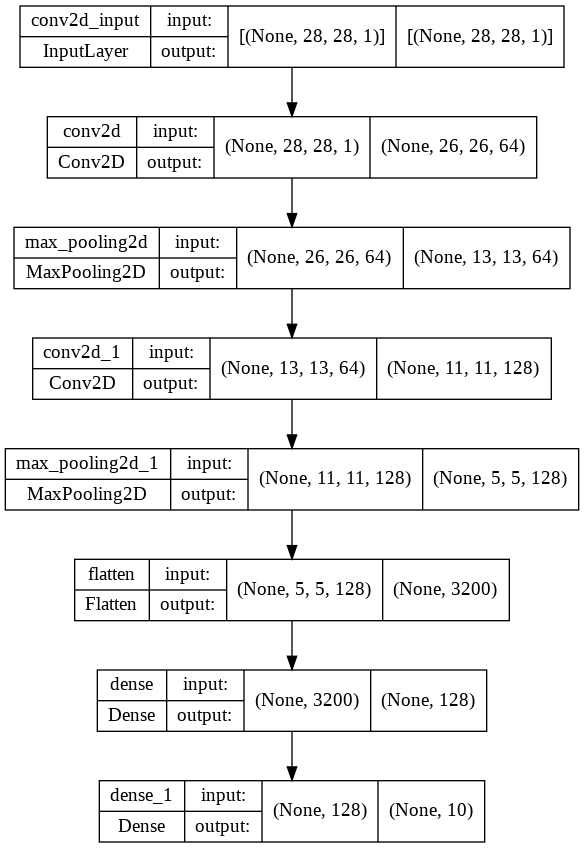

In [32]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [33]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 116s 136ms/step - loss: 0.4576 - accuracy: 0.8361 - val_loss: 0.3500 - val_accuracy: 0.8722
Epoch 2/5
844/844 [==============================] - 118s 140ms/step - loss: 0.3012 - accuracy: 0.8906 - val_loss: 0.2859 - val_accuracy: 0.8898
Epoch 3/5
844/844 [==============================] - 114s 135ms/step - loss: 0.2520 - accuracy: 0.9071 - val_loss: 0.2659 - val_accuracy: 0.8992
Epoch 4/5
844/844 [==============================] - 114s 135ms/step - loss: 0.2177 - accuracy: 0.9200 - val_loss: 0.2497 - val_accuracy: 0.9088
Epoch 5/5
844/844 [==============================] - 114s 135ms/step - loss: 0.1922 - accuracy: 0.9279 - val_loss: 0.2351 - val_accuracy: 0.9137


In [46]:
#Here, the training time for this dataset was much faster at about 20ms/step when compared to the mnist dataset at 366ms/step
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 2.2157 - accuracy: 0.8308


In [36]:
loss

2.2156996726989746

In [44]:
#From this result, we can see that the model does not perform as well on the fashion-mnist dataset as well as it did on the mnist dataset
#here the accuracy is 83% whereas there was an accuracy of 99% for the mnist dataset
accuracy

0.8307999968528748

In [38]:
predictions = cnn.predict(X_test)

In [39]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [40]:
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000000%
3: 0.0000000000%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000000%
7: 0.0000000000%
8: 0.0000000000%
9: 100.0000000000%


In [42]:
import numpy as np
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [43]:
len(incorrect_predictions)

1692

In [47]:
#16.4
#This model is to see what happens when you remove the first dense layer
cnn2 = Sequential()
cnn2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Flatten())
cnn2.add(Dense(units=10, activation='softmax'))
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [49]:
cnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
cnn2.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 119s 141ms/step - loss: 0.4952 - accuracy: 0.8237 - val_loss: 0.3845 - val_accuracy: 0.8623
Epoch 2/5
844/844 [==============================] - 118s 140ms/step - loss: 0.3332 - accuracy: 0.8806 - val_loss: 0.3371 - val_accuracy: 0.8777
Epoch 3/5
844/844 [==============================] - 122s 145ms/step - loss: 0.2876 - accuracy: 0.8960 - val_loss: 0.2896 - val_accuracy: 0.8948
Epoch 4/5
844/844 [==============================] - 121s 144ms/step - loss: 0.2579 - accuracy: 0.9074 - val_loss: 0.2679 - val_accuracy: 0.9025
Epoch 5/5
844/844 [==============================] - 117s 138ms/step - loss: 0.2337 - accuracy: 0.9145 - val_loss: 0.2642 - val_accuracy: 0.9072


In [52]:
loss2, accuracy2 = cnn2.evaluate(X_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.9805 - accuracy: 0.8549


Here, the training time for this model was nearly the same speed at about 20ms/step when compared to the original model at 19ms/step

In [53]:
loss2

1.980485200881958

In [54]:
accuracy2

0.8549000024795532

Here the accuracy is 85.5% whereas there was an accuracy of 83% for the original model. Clearly, this model performed slightly better when compared to the original one.

In [59]:
#This model is to see what happens when you add another dense layer with 4096 neurons
cnn3 = Sequential()
cnn3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Flatten())
cnn3.add(Dense(units=4096, activation='relu'))
cnn3.add(Dense(units=128, activation='relu'))
cnn3.add(Dense(units=10, activation='softmax'))
cnn3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 4096)             

In [61]:
cnn3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
cnn3.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 261s 308ms/step - loss: 0.4226 - accuracy: 0.8444 - val_loss: 0.3069 - val_accuracy: 0.8845
Epoch 2/5
844/844 [==============================] - 256s 304ms/step - loss: 0.2738 - accuracy: 0.8985 - val_loss: 0.3009 - val_accuracy: 0.8805
Epoch 3/5
844/844 [==============================] - 253s 300ms/step - loss: 0.2262 - accuracy: 0.9148 - val_loss: 0.2556 - val_accuracy: 0.9063
Epoch 4/5
844/844 [==============================] - 252s 299ms/step - loss: 0.1892 - accuracy: 0.9275 - val_loss: 0.2443 - val_accuracy: 0.9135
Epoch 5/5
844/844 [==============================] - 255s 302ms/step - loss: 0.1586 - accuracy: 0.9401 - val_loss: 0.2640 - val_accuracy: 0.9098


In [63]:
loss3, accuracy3 = cnn3.evaluate(X_test, y_test)

313/313 [==============================] - 13s 43ms/step - loss: 2.3544 - accuracy: 0.8416


Here, the training time for this model was slower at about 43ms/step when compared to the original model at 19ms/step

In [64]:
loss3

2.3544256687164307

In [65]:
accuracy3

0.8416000008583069

Here the accuracy is 84% whereas there was an accuracy of 83% for the original model. Clearly, this model performed slightly better when compared to the original one.